# LOAN PREDICTION USING MACHINE LEARNING
 

### Import required libraries and Upload the datasets

In [6]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
#read the csv files

loan_train=pd.read_csv(r'C:\Users\Veena\Downloads\train1.csv')
loan_test=pd.read_csv(r'C:\Users\Veena\Downloads\test1.csv')


### Observe the information of the dataset

In [8]:
#Details of the train file

loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#Information of the train file

loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
loan_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# columns in the datasets

loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Check for the missing datas and fill it out with required data


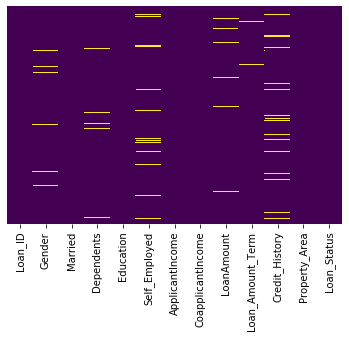

In [12]:
# CHECK FOR THE MISSING DATAS USING HEATMAP

sns.heatmap(loan_train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

There are few missing datas in the several columns. We need to count them and fill it before using any model to analyse the dataset


In [13]:
#COUNT THE MISSING DATAS OF EVERY COLUMN

total_null = loan_train.isnull().sum().sort_values(ascending=False)
miss_data = pd.concat([total_null], axis=1, keys=['Total'])
miss_data.head(13)

,Total
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_Status,0
Property_Area,0
CoapplicantIncome,0


In [14]:
# fill the missing datas

loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].dropna().mode().values[0] )
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].dropna().mode().values[0] )
loan_train['Gender'] = loan_train['Gender'].fillna(loan_train['Gender'].dropna().mode().values[0] )
loan_train['Dependents'] = loan_train['Dependents'].fillna(loan_train['Dependents'].dropna().mode().values[0] )
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].dropna().mode().values[0] )
loan_train['LoanAmount'] = loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].dropna().median() )
loan_train['Married'] = loan_train['Married'].fillna(loan_train['Married'].dropna().mode().values[0] )

We can use mode to fill the missing datas. But it is better to use median for Loan_Amount as it reduces error compared to that of mode

In [15]:
#Check again for the missing datas

total_null = loan_train.isnull().sum().sort_values(ascending=False)
miss_data = pd.concat([total_null], axis=1, keys=['Total'])
miss_data.head(13)

,Total
Loan_Status,0
Property_Area,0
Credit_History,0
Loan_Amount_Term,0
LoanAmount,0
CoapplicantIncome,0
ApplicantIncome,0
Self_Employed,0
Education,0
Dependents,0


There are no missing datas now. We can confirm using heatmap


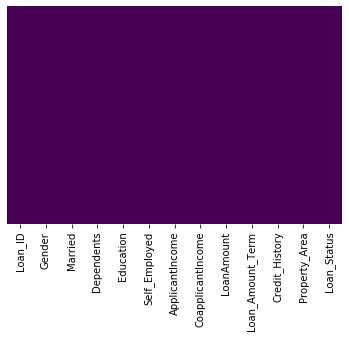

In [16]:
#using heatmap

sns.heatmap(loan_train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

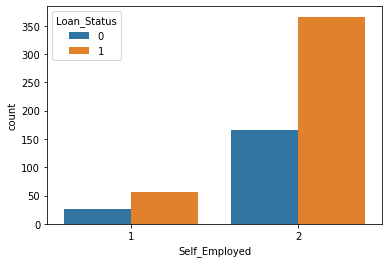

In [70]:
#ANALYSE THE DATA USING GRAPHS
#using count plot to analyse the data

#COUNTPLOT OF Self_Employed against Loan_Status
sns.countplot(data=loan_train,x='Self_Employed',hue='Loan_Status')

Here, We can observe that those who aren't self employed apply for loans mostly.

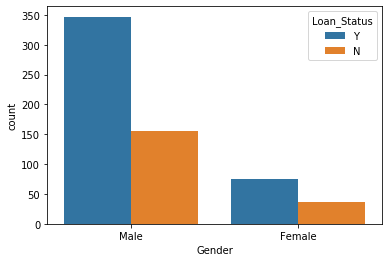

In [18]:
#COUNTPLOT OF Gender against Loan_Status

sns.countplot(data=loan_train,x='Gender',hue='Loan_Status')


Males are most likely to get approved for loan than Females


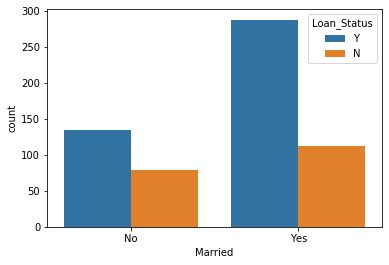

In [19]:
#COUNTPLOT OF Married against Loan_Status
sns.countplot(data=loan_train,x='Married',hue='Loan_Status')

Loan applicants who are married are most likely of getting approval for loan.


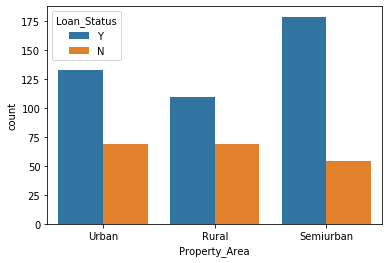

In [20]:
#COUNTPLOT OF Property_Area against Loan_Status
sns.countplot(data=loan_train,x='Property_Area',hue='Loan_Status')


Here, We can observe that applicants who live in Semiurban areas obtain more loans followed by Urban and Rural.


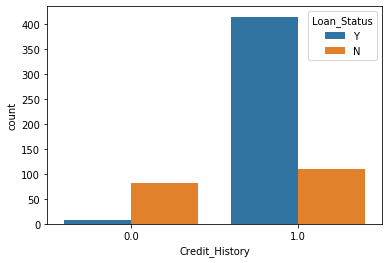

In [21]:
#COUNTPLOT OF Credit_History against Loan_Status
sns.countplot(data=loan_train,x='Credit_History',hue='Loan_Status')

Those who have history of returning the loans are most likely of getting approval for loan.

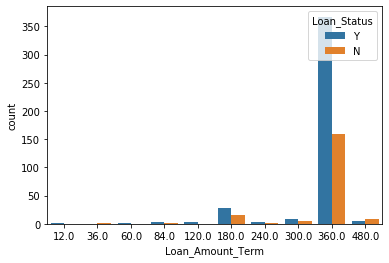

In [22]:
#COUNTPLOT OF Loan_Amount_Term against Loan_Status
sns.countplot(data=loan_train,x='Loan_Amount_Term',hue='Loan_Status')

Loan Applications are mostly 360 cyclic loan term.

In [24]:
#Observing the data using FacetGrid


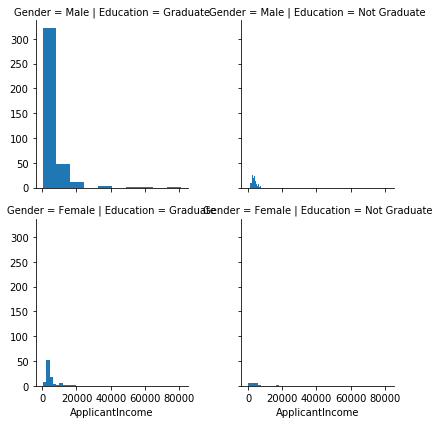

In [25]:
grid=sns.FacetGrid(data=loan_train,row='Gender',col='Education')
grid.map(plt.hist,'ApplicantIncome')

Male Graduate has the highest income when compared to others.


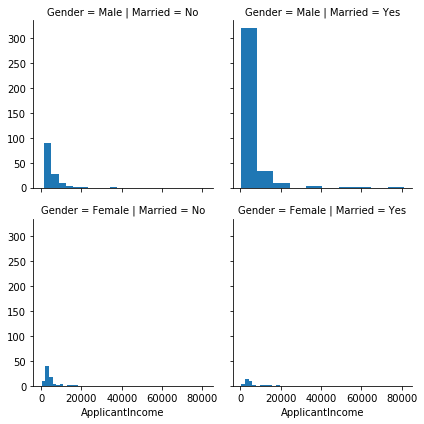

In [26]:
grid=sns.FacetGrid(data=loan_train,row='Gender',col='Married')
grid.map(plt.hist,'ApplicantIncome')

Here, We can see that Males have higher income than that of Females. Males who are married have higher income than that of unmarried ones.


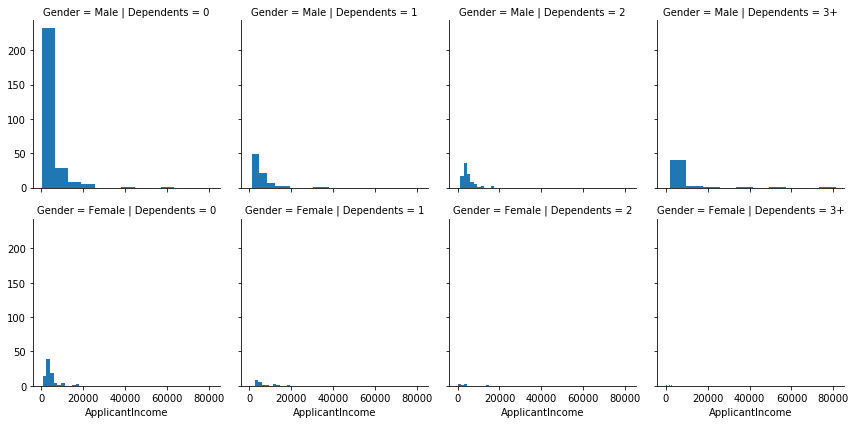

In [27]:
grid=sns.FacetGrid(data=loan_train,row='Gender',col='Dependents')
grid.map(plt.hist,'ApplicantIncome')

Males with no dependents tend to have high income and income reduces as the dependents increases.

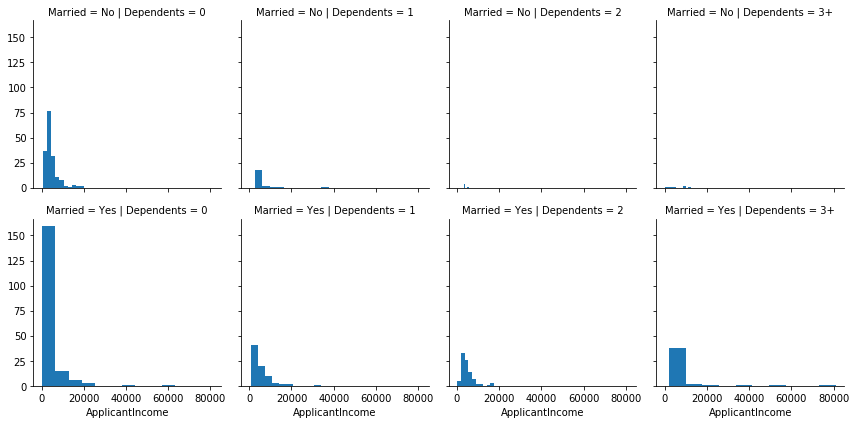

In [28]:
grid=sns.FacetGrid(data=loan_train,row='Married',col='Dependents')
grid.map(plt.hist,'ApplicantIncome')

Individual who is unmarried with no dependents have higher income. And also, those who are married and with no dependents have greater income.


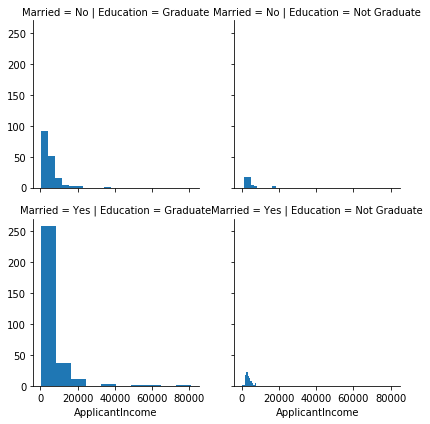

In [29]:
grid=sns.FacetGrid(data=loan_train,row='Married',col='Education')
grid.map(plt.hist,'ApplicantIncome')

Applicant who is married and graduate has greater income.

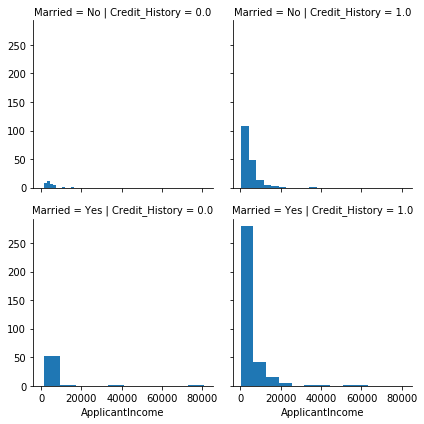

In [31]:
grid=sns.FacetGrid(data=loan_train,row='Married',col='Credit_History')
grid.map(plt.hist,'ApplicantIncome')

Those who have good credit history have high income regardless of marital status.


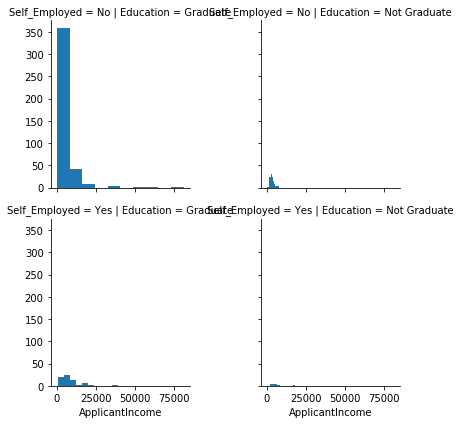

In [32]:
grid=sns.FacetGrid(data=loan_train,row='Self_Employed',col='Education')
grid.map(plt.hist,'ApplicantIncome')

Here we can see that individual who is not self employed but graduated has higher income.


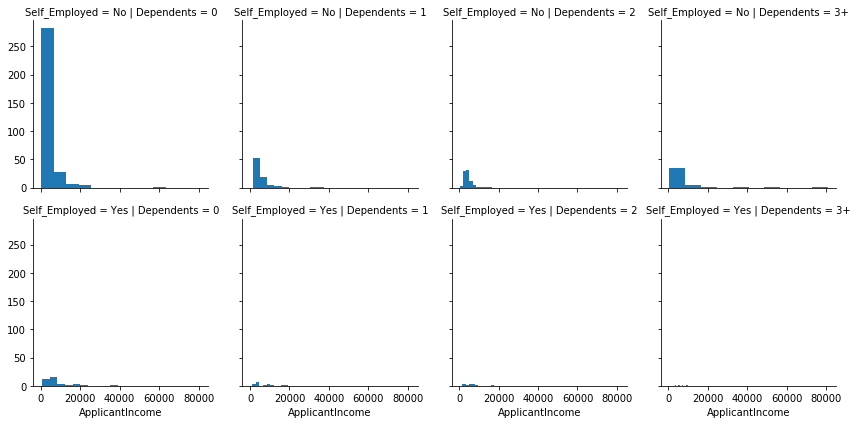

In [33]:
grid=sns.FacetGrid(data=loan_train,row='Self_Employed',col='Dependents')
grid.map(plt.hist,'ApplicantIncome')


Not a self employed with no dependents has greater income.

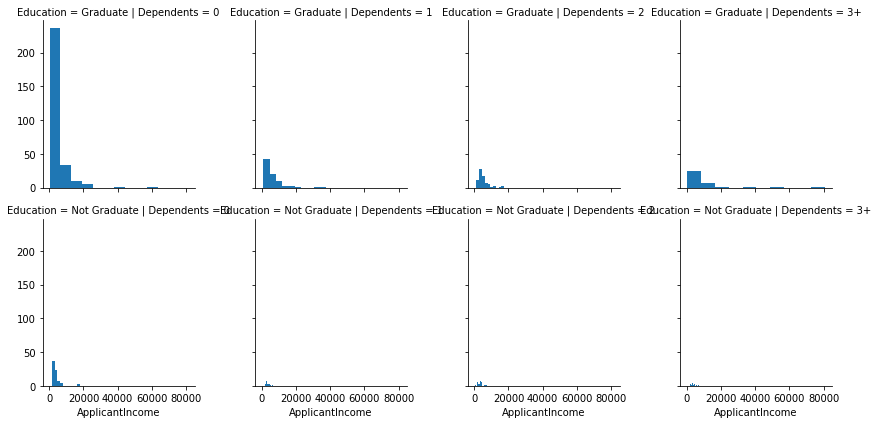

In [34]:
grid=sns.FacetGrid(data=loan_train,row='Education',col='Dependents')
grid.map(plt.hist,'ApplicantIncome')

A graduate with no dependent has high income.

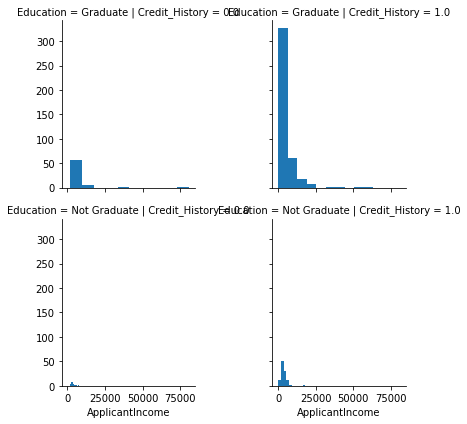

In [35]:
grid=sns.FacetGrid(data=loan_train,row='Education',col='Credit_History')
grid.map(plt.hist,'ApplicantIncome')

A graduate with good Credit history has higher income.

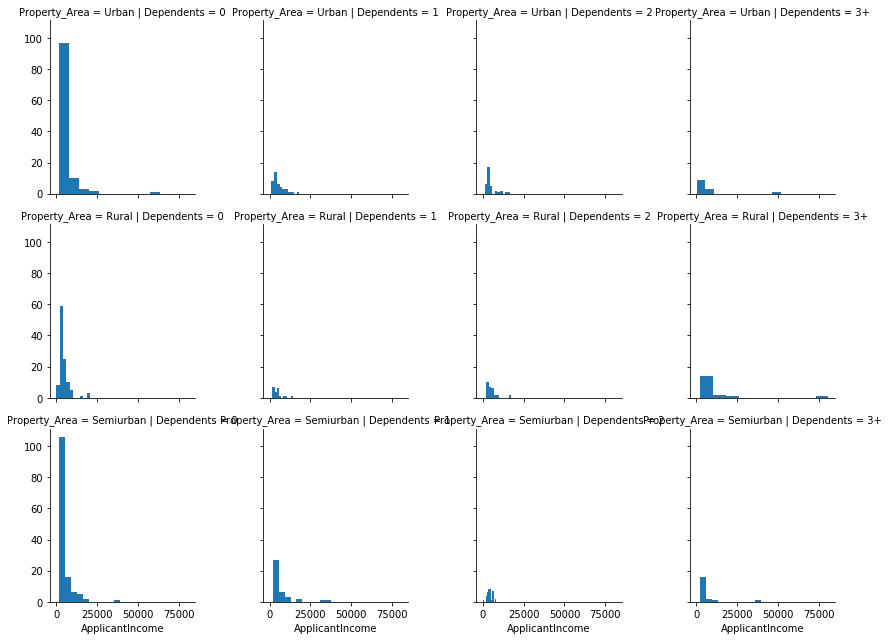

In [36]:
grid=sns.FacetGrid(data=loan_train,row='Property_Area',col='Dependents')
grid.map(plt.hist,'ApplicantIncome')

Individual with no dependents tend to have more income.


In [37]:
#observing the general information about the dataset
loan_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


We need to convert the type of attributes from object to basic datatypes


In [39]:
conv_dtype = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Graduate': 1, 'Not Graduate': 2, 'Urban': 3, 'Semiurban': 2,'Rural': 1, 'Y': 1, 'N': 0, '3+': 3}


In [40]:
#Apply to each and every element in the dataframe

loan_train = loan_train.applymap(lambda s: conv_dtype.get(s) if s in conv_dtype else s)
loan_test = loan_test.applymap(lambda s: conv_dtype.get(s) if s in conv_dtype else s)

In [41]:
#Check the information again
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [42]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    float64
 2   Married            367 non-null    int64  
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    int64  
 5   Self_Employed      344 non-null    float64
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 34.5+ KB


Here, all the fields except for Loan_ID and Dependents has been converted from object Dtype. We can drop Loan_ID from the dataframe


In [43]:
#drop the loan id
loan_train.drop('Loan_ID', axis = 1, inplace = True)


In [44]:
#Convert the type of dependents
Dependents_Train = pd.to_numeric(loan_train.Dependents)
Dependents_Test = pd.to_numeric(loan_test.Dependents)


In [45]:
#Drop the object type Dependents from the dataframe
loan_train.drop(['Dependents'], axis = 1, inplace = True)
loan_test.drop(['Dependents'], axis = 1, inplace = True)


In [46]:
#Concatanate the numeric dtype Dependents to dataframe
loan_train = pd.concat([loan_train, Dependents_Train], axis = 1)
loan_test = pd.concat([loan_test, Dependents_Test], axis = 1)

In [47]:
#Check the information
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


### Training Phase


In [48]:
#define X and y
X = loan_train.drop('Loan_Status', axis = 1)
y = loan_train['Loan_Status']


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#Spliting the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Lets use Logistic Regression to analyse and predict

In [51]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [52]:
#fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#Prediction

ypred = lr.predict(X_test)

In [54]:
#import classsification_report, confusion_matrix and accuarcy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
#print confusion_matrix
print(confusion_matrix(y_test,ypred))

[[ 25  33]
 [  2 143]]


In [56]:
#print accuracy_score
print(accuracy_score(y_test,ypred))


0.8275862068965517


In [57]:
#print classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        58
           1       0.81      0.99      0.89       145

    accuracy                           0.83       203
   macro avg       0.87      0.71      0.74       203
weighted avg       0.84      0.83      0.80       203



### Lets use DecisionTreeClassifier to analyse

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
#fit the model
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
#predict
ypred_dtree=dtree.predict(X_test)


In [61]:
print(confusion_matrix(y_test,ypred_dtree))


[[ 31  27]
 [ 24 121]]


In [62]:
print(accuracy_score(y_test,ypred_dtree))


0.7487684729064039


In [63]:
print(classification_report(y_test,ypred_dtree))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55        58
           1       0.82      0.83      0.83       145

    accuracy                           0.75       203
   macro avg       0.69      0.68      0.69       203
weighted avg       0.75      0.75      0.75       203



### Lets use RandomForestClassifier to anlyse

In [64]:
from sklearn.ensemble import RandomForestClassifier


In [65]:
#fit the model
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
#predict
rfc_pred=rfc.predict(X_test)


In [67]:
print(confusion_matrix(y_test,rfc_pred))

[[ 26  32]
 [  7 138]]


In [68]:
print(accuracy_score(y_test,rfc_pred))

0.8078817733990148


In [69]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.45      0.57        58
           1       0.81      0.95      0.88       145

    accuracy                           0.81       203
   macro avg       0.80      0.70      0.72       203
weighted avg       0.80      0.81      0.79       203



## CONCLUSION: 
Here, We can see that **LogisticRegression** performs better based on accuracy_score; followed by **RandomForestClassifier** and **DecisonTreeClassifier**
